### Minimum Vertex Cover, czyli problem całkowitego pokrycia grafu minimalną liczbą wierzchołków.

##### Wstęp

Minimum Vertex Cover jest typowym problemem optymalizacyjnym z listy NP-trudnych.

W tym problemie możemy podzielić wierzchołki na widzące - czyli wchodzące w skład pokrywających graf oraz na ślepe, czyli te, których nie wybieramy w rozwiązaniu.

Do jego rozwiązania użyłam instancji algorytmu genetycznego (GA) z paczki pygad z własną funkcją fitness oraz algorytmu optymalizacji kolonią mrówek (ACO) napisanej samodzielnie.


##### Implementacja klasy Graph

In [1]:
import random
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.nodes = []
        self.edges = []
        self.coords = []
        self.edges_set = set()
    
    def create_nodes(self, n):
        self.nodes = [i for i in range(n)]
        return self.nodes
    
    def create_edges(self, edges):
        self.edges = edges
        return self.edges
    
    def create_coords(self, coords):
        self.coords = coords
        return self.coords

    def create_random_edges(self, n, min_param, max_param):
        self.edges = [[] for i in range(n)]
        max = int(n * max_param)
        min = int(n * min_param)
        if min == 0:
            min = 1
            max = 2

        for i in range(n):
            for j in range(random.randint(min, max)):
                r = random.randint(0, n - 1)
                if r != i:
                    self.edges[i].append(r)
                    self.edges[r].append(i)

        for i in range(n):
            if len(self.edges[i]) == 0:
                r = random.randint(0, n - 1)
                self.edges[i].append(r)
                self.edges[r].append(i)

        return self.edges
    
    def create_random_coords(self, n):
        self.coords = [[] for i in range(n)]
        for i in range(n):
            self.coords[i].append(random.randint(0, 100))
            self.coords[i].append(random.randint(0, 100))
        return self.coords

    def create_edges_set(self):
        for i in range(len(self.edges)):
            for j in self.edges[i]:
                if i < j:
                    self.edges_set.add((i, j))
                else:
                    self.edges_set.add((j, i))
        return self.edges_set

    def plot_all_nodes(self):
        for i in range(len(self.coords)):
            plt.plot(self.coords[i][0], self.coords[i][1], markersize=15, marker=".", c="r")
        plt.axis("off")
        fig = plt.gcf()
        fig.set_size_inches([10, 6])

    def plot_all_edges(self):
        for i in range(len(self.edges)):
            for j in range(len(self.edges[i])):
                plt.plot((self.coords[i][0], self.coords[self.edges[i][j]][0]), (self.coords[i][1], self.coords[self.edges[i][j]][1]), c="r")

    def plot_covered_edges(self, solution):
        for i in range(len(self.edges)):
            if solution[i] == 1:
                for j in range(len(self.edges[i])):
                    plt.plot((self.coords[i][0], self.coords[self.edges[i][j]][0]), (self.coords[i][1], self.coords[self.edges[i][j]][1]), c="b")

    def plot_covered_nodes(self, solution):
        for i in range(len(self.coords)):
            if solution[i] == 1:
                plt.plot(self.coords[i][0], self.coords[i][1], "b.", markersize=15)



##### Implementacja GA

Fitness function opiera się na karaniu algorytmu za wybranie dwóch wierzchołków widzących koło siebie oraz mniejszą liczbę pokrytych krawędzi.

In [2]:
import pygad
import numpy as np


def fitness_function(graph):
    def fitness(solution, solution_idx):
        fitness = 0
        es = set()

        for i in graph.nodes:
            if solution[i] != 0:
                for j in graph.edges[i]:
                    if i < j:
                        es.add((i, j))
                    else:
                        es.add((j, i))
                    if solution[j] != 0:
                        fitness -= 10
        
        diff = graph.edges_set - es
        fitness -= len(diff)*100

        return fitness
    return fitness

def run_small_ga_instance(graph, n):
    ga_instance = pygad.GA(gene_space=[0, 1],
                        num_generations=300,
                        num_parents_mating=50,
                        fitness_func=fitness_function(graph),
                        sol_per_pop=300,
                        num_genes=n,
                        parent_selection_type='sss',
                        keep_parents=4,
                        crossover_type="single_point",
                        mutation_type="random",
                        mutation_percent_genes=20)
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    # print("Najlepsze rozwiązanie: {solution}".format(solution=solution))
    # print("Minimum vertex cover size: {solution_ones}".format(solution_ones=np.count_nonzero(solution)))
    # print("Najlepsza wartość funkcji fitness: {solution_fitness}".format(solution_fitness=solution_fitness))
    # ga_instance.plot_fitness()
    # graph.plot_all_edges()
    # graph.plot_all_nodes()
    # graph.plot_covered_nodes(solution)
    # graph.plot_covered_edges(solution)
    # plt.show()
    return np.count_nonzero(solution)


def run_medium_ga_instance(graph, n):
    ga_instance = pygad.GA(gene_space=[0, 1],
                        num_generations=500,
                        num_parents_mating=200,
                        fitness_func=fitness_function(graph),
                        sol_per_pop=600,
                        num_genes=n,
                        parent_selection_type='sss',
                        keep_parents=20,
                        crossover_type="single_point",
                        mutation_type="random",
                        mutation_percent_genes=15)
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    # print("Najlepsze rozwiązanie ga: {solution}".format(solution=solution))
    # print("Minimum vertex cover size ga: {solution_ones}".format(solution_ones=np.count_nonzero(solution)))
    # print("Najlepsza wartość funkcji fitness: {solution_fitness}".format(solution_fitness=solution_fitness))
    # ga_instance.plot_fitness()
    # graph.plot_all_edges()
    # graph.plot_all_nodes()
    # graph.plot_covered_nodes(solution)
    # graph.plot_covered_edges(solution)
    # plt.show()
    return np.count_nonzero(solution)

def run_large_ga_instance(graph, n):
    ga_instance = pygad.GA(gene_space=[0, 1],
                        num_generations=500,
                        num_parents_mating=250,
                        fitness_func=fitness_function(graph),
                        sol_per_pop=600,
                        num_genes=n,
                        parent_selection_type='sss',
                        keep_parents=40,
                        crossover_type="single_point",
                        mutation_type="random",
                        mutation_percent_genes=15)
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    # print("Najlepsze rozwiązanie ga: {solution}".format(solution=solution))
    # print("Minimum vertex cover size ga: {solution_ones}".format(solution_ones=np.count_nonzero(solution)))
    # print("Najlepsza wartość funkcji fitness: {solution_fitness}".format(solution_fitness=solution_fitness))
    # ga_instance.plot_fitness()
    # graph.plot_all_edges()
    # graph.plot_all_nodes()
    # graph.plot_covered_nodes(solution)
    # graph.plot_covered_edges(solution)
    # plt.show()
    return np.count_nonzero(solution)


##### Implementacja ACO

In [3]:
from matplotlib import pyplot as plt
import numpy as np

class AntColony:
    def __init__(self, graph, colony_size, alpha, beta, evaporation_rate, initial_pheromone):
        self.graph = graph
        self.colony_size = colony_size
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.initial_pheromone = initial_pheromone
        self.pheromone = [[self.initial_pheromone for j in range(len(self.graph.nodes))] for i in range(len(self.graph.nodes))]

    def find_minimum_vertex_cover(self):
        best_solution = None
        best_solution_cost = float('inf')
        for _ in range(self.colony_size):
            solution = self.find_solution()
            solution_cost = self.calculate_solution_cost(solution)
            if solution_cost < best_solution_cost:
                best_solution = solution
                best_solution_cost = solution_cost
            self.update_pheromone(solution)
        return best_solution

    def find_solution(self):
        solution = [0] * len(self.graph.nodes)
        self.visited = [0] * len(self.graph.nodes)
        for i in range(len(self.graph.nodes)):
            if self.visited[i] == 0:
                self.visited[i] = 1
                solution[i] = 1
                for j in self.graph.edges[i]:
                    self.visited[j] = 1

        for i in range(len(self.graph.nodes)):
            for j in self.graph.edges[i]:
                if solution[i] == 0 and solution[j] == 0:
                    solution[i] = 1
                    break

        return solution

    def calculate_solution_cost(self, solution):
        return sum(solution)

    def update_pheromone(self, solution):
        for i in range(len(solution)):
            if solution[i] == 1:
                for j in self.graph.edges[i]:
                    self.pheromone[i][j] += 1
                    self.pheromone[j][i] += 1
        for i in range(len(self.graph.nodes)):
            for j in range(i+1, len(self.graph.nodes)):
                self.pheromone[i][j] *= (1 - self.evaporation_rate)
                self.pheromone[j][i] *= (1 - self.evaporation_rate)

    def plot_graph(self):
        edges = self.graph.edges
        nodes = self.graph.nodes
        coords = self.graph.coords
        
        x = [coords[i][0] for i in nodes]
        y = [coords[i][1] for i in nodes]
        plt.scatter(x, y, c='r')
        for i in range(len(nodes)):
            for j in range(len(edges[i])):
                plt.plot([x[i], x[edges[i][j]]], [y[i], y[edges[i][j]]], 'r')
    
    def plot_solution(self, solution):
        edges = self.graph.edges
        nodes = self.graph.nodes
        coords = self.graph.coords
        
        x = [coords[i][0] for i in nodes]
        y = [coords[i][1] for i in nodes]
        plt.scatter(x, y, c='r')
        covered_vertices = []
        for i in range(len(solution)):
            if solution[i] == 1:
                plt.scatter(x[i], y[i], c='b')
                covered_vertices.append(i)
        for i in range(len(covered_vertices)):
            for j in edges[covered_vertices[i]]:
                plt.plot([x[covered_vertices[i]], x[j]], [y[covered_vertices[i]], y[j]], 'b')

def run_ant_colony(graph):
    colony = AntColony(graph, 100, 1.5, 1, 0.1, 500)

    solution = colony.find_minimum_vertex_cover()

    # colony.plot_graph()
    # colony.plot_solution(solution)
    # plt.show()

    # print('The minimum vertex cover size ants: {}'.format(sum(solution)))
    return sum(solution)

##### Implementacja grafów do eksperymentu (po 3 z każdego rozmiaru)

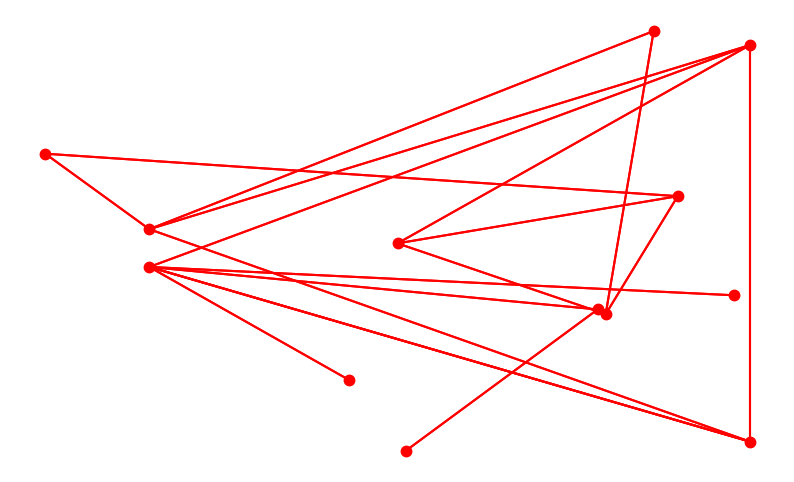

In [10]:
small_n = 6

#small input 1
graph_6_1 = Graph()
graph_6_1.create_nodes(small_n)
graph_6_1.create_edges([[1, 2, 3, 4, 5], [0, 2], [0, 1], [0], [0], [0]])
graph_6_1.create_coords([[50, 50], [40, 40], [50, 35], [70, 60], [75, 45], [65, 30]])
graph_6_1.create_edges_set()
min_cover_6_1 = 2

#small input 2
graph_6_2 = Graph()
graph_6_2.create_nodes(small_n)
graph_6_2.create_edges([[1, 2, 3], [0, 2], [0, 1, 4], [0, 4, 5], [2, 3], [3]])
graph_6_2.create_coords([[40, 50], [25, 35], [40, 20], [70, 50], [70, 20], [95, 50]])
graph_6_2.create_edges_set()
min_cover_6_2 = 3

#small input 3
graph_6_3 = Graph()
graph_6_3.create_nodes(small_n)
graph_6_3.create_edges([[1, 4, 5], [0, 2, 3], [1, 3], [1, 2, 4], [0, 3, 5], [0, 4]])
graph_6_3.create_coords([[20, 80], [40, 80], [50, 50], [40, 10], [20, 10], [10, 50]])
graph_6_3.create_edges_set()
min_cover_6_3 = 4

medium_n = 13

#medium input 1
graph_13_1 = Graph()
graph_13_1.create_nodes(medium_n)
graph_13_1.create_edges([[11], [4, 12, 5, 7], [10, 6, 12], [9], [1, 9, 5, 9], [4, 1, 6, 9], [5, 2, 10], [1, 10], [9], [3, 4, 8, 4, 5, 11], [2, 7, 6], [0, 9], [1, 2]])
graph_13_1.create_coords([[47, 7], [15, 54], [81, 61], [40, 22], [90, 9], [90, 93], [46, 51], [78, 96], [88, 40], [15, 46], [72, 36], [71, 37], [2, 70]])
graph_13_1.create_edges_set()
min_cover_13_1 = 6

#medium input 2
graph_13_2 = Graph()
graph_13_2.create_nodes(medium_n)
graph_13_2.create_edges([[1], [0, 6, 7], [9, 6, 4, 5], [6, 8], [5, 2, 11], [4, 2, 9, 9], [1, 2, 3, 12, 12, 12], [1, 11], [3, 11, 12], [2, 5, 5], [12, 12], [8, 7, 4], [6, 6, 10, 10, 8, 6]])
graph_13_2.create_coords([[71, 36], [21, 39], [37, 71], [12, 30], [66, 0], [50, 6], [1, 64], [68, 57], [62, 60], [85, 24], [82, 30], [59, 82], [16, 100]])
min_cover_13_2 = 10

#medium input 3
graph_13_3 = Graph()
graph_13_3.create_nodes(medium_n)
graph_13_3.create_edges([[5, 6, 7], [5, 7, 2], [1], [12, 4, 4, 5, 10, 12], [3, 6, 3], [0, 1, 3, 7], [4, 0, 7], [1, 5, 6, 0, 9], [10, 11, 11], [7], [8, 3], [8, 8], [3, 3]])
graph_13_3.create_coords([[5, 70], [23, 17], [35, 92], [48, 23], [7, 37], [70, 21], [78, 62], [7, 45], [18, 61], [85, 40], [99, 72], [12, 47], [36, 94]])
min_cover_13_3 = 10

large_n = 30

#large input 1
graph_30_1 = Graph()
graph_30_1.create_nodes(large_n)
graph_30_1.create_edges([[19, 18, 15], [12, 22], [10, 11, 16, 17], [27, 27], [8], [20], [9], [9, 15, 26], [4, 25], [7, 16, 26, 13, 26, 6], [2, 20], [2, 17], [1, 26, 29, 29], [9], [19, 20, 24], [7, 0], [9, 2, 25, 23], [11, 2], [0, 27, 23, 24], [0, 14, 23], [5, 10, 14, 27], [29, 22], [1, 21], [18, 19, 16, 27], [18, 14], [8, 16, 28], [9, 12, 7, 9], [3, 3, 18, 20, 23], [25, 29], [21, 28, 12, 12]])
graph_30_1.create_coords([[40, 76], [81, 31], [76, 85], [82, 74], [50, 23], [79, 93], [5, 90], [34, 75], [94, 70], [78, 65], [8, 96], [58, 4], [55, 51], [98, 84], [33, 15], [83, 37], [9, 99], [47, 2], [57, 34], [18, 85], [65, 24], [46, 64], [41, 23], [69, 26], [38, 39], [65, 11], [94, 13], [84, 36], [93, 13], [31, 21]])
min_cover_30_1 = 20

#large input 2
graph_30_2 = Graph()
graph_30_2.create_nodes(large_n)
graph_30_2.create_edges([[5, 13], [12, 11, 6], [15, 28, 5], [17, 5, 7], [29, 9, 19, 25, 28], [0, 3, 2, 6], [1, 5], [3, 28, 23], [13, 28, 15], [4, 24], [22, 15], [1, 23, 15, 28], [1, 28], [0, 8, 28, 22], [15, 28], [2, 10, 11, 14, 8, 26], [27, 24], [3, 23], [27, 20], [4, 24], [18, 22, 22], [24, 27], [10, 20, 20, 13, 29], [11, 17, 7, 27], [16, 21, 9, 19], [4], [15], [16, 18, 23, 21], [2, 7, 8, 12, 13, 14, 11, 4], [4, 22]])
graph_30_2.create_coords([[77, 76], [99, 52], [60, 27], [78, 14], [97, 27], [64, 75], [19, 7], [62, 9], [32, 98], [46, 55], [76, 51], [32, 68], [41, 90], [66, 35], [92, 39], [24, 23], [34, 1], [94, 30], [19, 13], [41, 60], [24, 3], [28, 49], [79, 10], [31, 96], [54, 89], [92, 19], [34, 49], [54, 88], [62, 5], [72, 49]])
min_cover_30_2 = 22

#large input 3
graph_30_3 = Graph()
graph_30_3.create_nodes(large_n)
graph_30_3.create_edges([[13, 18, 6], [8], [20, 20, 14], [15, 26], [16, 8, 7, 17, 17, 29], [23], [0, 16], [4, 18], [1, 4, 22, 13], [11, 22], [22, 17, 16], [9, 25, 18, 21, 22, 28], [23], [0, 20, 8, 21, 22], [2, 15, 24], [3, 20, 14, 16], [4, 6, 10, 15], [10, 4, 4, 18], [0, 7, 11, 29, 17], [25, 23, 23], [2, 2, 13, 15, 24], [11, 13, 27], [8, 9, 10, 11, 13], [12, 19, 19, 5], [20, 28, 14], [11, 19, 28, 29], [3], [21], [24, 25, 11], [18, 4, 25]])
graph_30_3.create_coords([[99, 93], [0, 60], [6, 21], [86, 64], [22, 7], [51, 41], [73, 97], [46, 69], [40, 2], [60, 16], [36, 97], [55, 21], [42, 46], [87, 61], [1, 87], [79, 24], [66, 37], [37, 60], [60, 48], [88, 52], [58, 85], [43, 1], [15, 47], [10, 99], [10, 10], [47, 56], [75, 93], [99, 5], [20, 76], [2, 21]])
min_cover_30_3 = 22

#Przykładowy graf 13_1:
graph_13_1.plot_all_edges()
graph_13_1.plot_all_nodes()

    

##### Eksperyment implementacja

In [12]:
import time
import tabulate

small_inputs = [graph_6_1, graph_6_2, graph_6_3]
medium_inputs = [graph_13_1, graph_13_2, graph_13_3]
large_inputs = [graph_30_1, graph_30_2, graph_30_3]
small_mins = [min_cover_6_1, min_cover_6_2, min_cover_6_3]
medium_mins = [min_cover_13_1, min_cover_13_2, min_cover_13_3]
large_mins = [min_cover_30_1, min_cover_30_2, min_cover_30_3]

def exp(inputs, n):
    if inputs == small_inputs:
        ga = run_small_ga_instance
    elif inputs == medium_inputs:
        ga = run_medium_ga_instance
    else:
        ga = run_large_ga_instance
    correct_ga = 0
    correct_aco = 0
    times_ga = []
    times_aco = []
    for i in range (100):
        chosen_graph = random.choice(inputs)
        min_cover = small_mins[inputs.index(chosen_graph)]
        time_start_ga = time.time()
        res_ga = ga(chosen_graph, n)
        time_end_ga = time.time()
        if res_ga == min_cover:
            correct_ga += 1
            times_ga.append(time_end_ga - time_start_ga)
        time_start_aco = time.time()
        res_aco = run_ant_colony(chosen_graph)
        time_end_aco = time.time()
        if res_aco == min_cover:
            correct_aco += 1
            times_aco.append(time_end_aco - time_start_aco)
        if len(times_ga) == 0:
            avg_ga_time = 0
        else:
            avg_ga_time = sum(times_ga)/len(times_ga)
        if len(times_aco) == 0:
            avg_aco_time = 0
        else:
            avg_aco_time = sum(times_aco)/len(times_aco)
        
    print(tabulate.tabulate([["GA", correct_ga], ["Average GA time", avg_ga_time],["ACO", correct_aco], ["Average ACO time", avg_aco_time]], headers=["Algorithm", "Correct"]))

##### Eksperyment small_inputs

Algorytm genetyczny sprawdził się doskonale, rozwiązał wszystkie zadane mu grafy, w przypadku ACO poprawność wyniosła 28%, jednak czas wykonania jest o wiele szybszy.

In [6]:
exp(small_inputs, 6)

Algorithm               Correct
----------------  -------------
GA                100
Average GA time     2.57828
ACO                28
Average ACO time    0.000858997


##### Eksperyment medium_inputs

Jak widać poniżej, wyniki prezentują się o wiele gorzej. Jedynie około 1/4 grafów została rozwiązana przez algorytm genetyczny w średnim czasie około 11 sekund, ACO nie sprawdziło się wcale.

In [13]:
exp(medium_inputs, 13)

Algorithm           Correct
----------------  ---------
GA                  24
Average GA time     11.0575
ACO                  0
Average ACO time     0


##### Eksperyment large_inputs

Niestety przekracza on czas dozwolony przez jupyter notebook, jednak wyniki prezentują się tak:\
GA                 0\
Average GA time   24.4784\
ACO                0\
Average ACO time   0.0114994

Jak można zauważyć, niestety zarówno GA, jak i ACO nie poradziły sobie zupełnie ze znalezieniem poprawnego rozwiązania. Średni czas wykonania algorytmu genetycznego również znacznie wzrósł, wynosi teraz około 24,5 sekundy.


In [ ]:
# exp(large_inputs, 30)

W celu sprawdzenia, jakie wyniki są poprawne, korzystałam z algorytmu opartego na przeszukiwaniu binarnym znalezionym w internecie (patrz: bibliografia) i przerobionego tak, aby działał z wcześniej zaimplementowaną klasą Graph.

In [ ]:
# A Python3 program to find size of minimum
# vertex cover using Binary Search

# Returns true if there is a possible subSet
# of size 'k' that can be a vertex cover
def isCover(graph, k):
    V = len(graph.nodes)
    E = len(graph.edges_set)

    # Set has first 'k' bits high initially
    Set = (1 << k) - 1

    limit = (1 << V)

    # to mark the edges covered in each
    # subSet of size 'k'
    vis = [[None] * V for i in range(V)]

    while (Set < limit):

        # Reset visited array for every
        # subSet of vertices
        vis = [[0] * V for i in range(V)]

        # Set counter for number of edges covered
        # from this subSet of vertices to zero
        cnt = 0

        # selected vertex cover is the
        # indices where 'Set' has its bit high
        j = 1
        v = 0
        while(j < limit):
            if (Set & j):

                # Mark all edges emerging out of
                # this vertex visited
                for k in graph.edges[v]:
                    if (not vis[v][k]):
                        vis[v][k] = 1
                        vis[k][v] = 1
                        cnt += 1
            j = j << 1
            v += 1

        # If the current subSet covers all the edges
        if (cnt == E):
            return True

        # Generate previous combination with k bits high
        # Set & -Set = (1 << last bit high in Set)
        c = Set & -Set
        r = Set + c
        Set = (((r ^ Set) >> 2) // c) | r
    return False

# Returns answer to graph stored in Graph object
def findMinCover(graph):
    # Binary search the answer
    left = 1
    right = len(graph.nodes)
    while (right > left):
        mid = (left + right) >> 1
        if (isCover(graph, mid) == False):
            left = mid + 1
        else:
            right = mid

    # at the end of while loop both left and
    # right will be equal, as when they are
    # not, the while loop won't exit the
    # minimum size vertex cover = left = right
    return left



##### Podsumowanie

Oba algorytmy sprawdzają się najlepiej dla grafów o małej liczbie wierzchołków, wtedy są też najbardziej optymalne czasowo. Efektywniejszy okazał się jednak algorytm genetyczny i to właśnie jego lepiej użyć do rozwiązania powyższego problemu.

##### Bibliografia:

https://en.wikipedia.org/wiki/Vertex_cover\
https://www.geeksforgeeks.org/finding-minimum-vertex-cover-graph-using-binary-search/\
https://www.interviewbit.com/blog/vertex-cover-problem/